In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [58]:
df = pd.read_excel("Dataset_HPLC.xlsx", sheet_name="Dinh luong")
df = df.dropna()
df.head(5)

,No.,Name,Group,%CM,%CA,%CAL,600,602,604,606,...,3982,3984,3986,3988,3990,3992,3994,3996,3998,4000
0,1.0,21.1.8.YB-13,1.0,2.57,0.09,9.83,0.222,0.223,0.221,0.217,...,-0.006,-0.006,-0.006,-0.006,-0.006,-0.006,-0.006,-0.006,-0.006,-0.006
1,2.0,21.1.8.YB-24,1.0,0.69,0.04,3.75,0.263,0.261,0.257,0.257,...,-0.007,-0.007,-0.007,-0.007,-0.006,-0.007,-0.007,-0.007,-0.007,-0.007
2,3.0,21.1.8.YB-38,1.0,0.43,0.05,5.53,0.252,0.253,0.253,0.252,...,-0.006,-0.007,-0.007,-0.007,-0.006,-0.007,-0.007,-0.007,-0.007,-0.007
3,4.0,21.1.8.YB-40,1.0,2.04,0.06,5.21,0.259,0.258,0.259,0.259,...,-0.008,-0.009,-0.009,-0.009,-0.008,-0.008,-0.008,-0.009,-0.009,-0.009
4,5.0,21.1.8.YB-41,1.0,0.13,0.09,4.60,0.206,0.203,0.200,0.198,...,0.000,-0.001,0.000,0.001,0.001,0.000,0.000,-0.001,-0.001,-0.001


In [59]:
X = df.iloc[:, 6:]
y = df.iloc[:, 5]

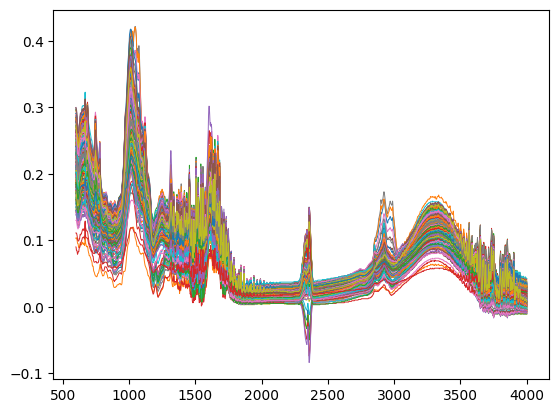

In [60]:
plt.plot(X.T, linewidth = 0.7)
plt.show()

In [61]:
def snv(input):
    output = np.zeros_like(input)
    for i in range(input.shape[0]):
        output[i, :] = (input[i, :] - np.mean(input[i, :])) / np.std(input[i, :])
    return output

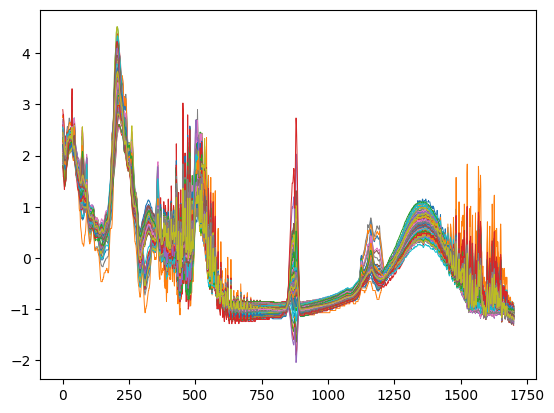

In [62]:
Xsnv = snv(X.values)
plt.plot(Xsnv.T, linewidth = 0.7)
plt.show()

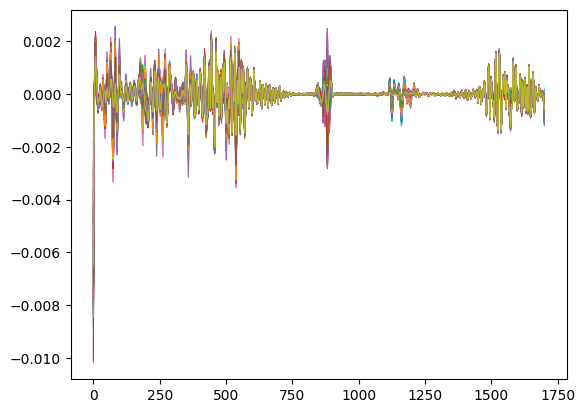

In [63]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.signal import savgol_filter

X_deriv = savgol_filter(X, window_length=25, polyorder=5, deriv=2)
plt.plot(X_deriv.T, linewidth = 0.7)
plt.show()

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_deriv, y, test_size=0.3, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 1701), (69, 1701), (160,), (69,))

In [65]:
# def SPA(X, k):
#     n_samples, n_features = X.shape
#     selected_features = []
#     selected_features.append(0)

#     first_feature = 0

#     for i in range(k):
#         remain_features = [i for i in range (n_features) if i != first_feature]
#         selected_matric = X[:, selected_features]
#         remain_matrix = 

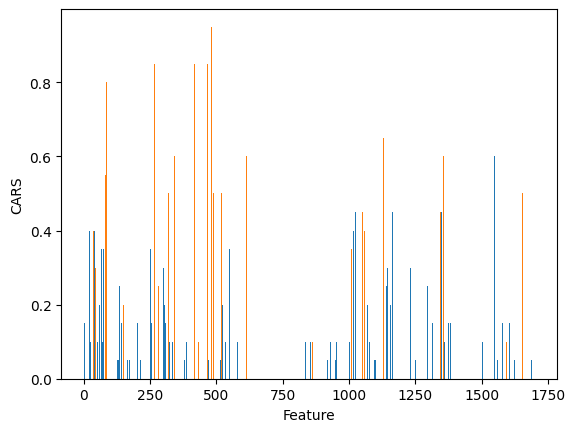

In [66]:
from auswahl import CARS

np.random.seed(1337)
X = X_train
y = y_train

cars = CARS(n_features_to_select=100)
cars.fit(X, y)

colors = np.full(X.shape[1], fill_value='C00')
colors[cars.get_support()] = 'C01'

plt.bar(x=np.arange(X.shape[1]), height=cars.feature_importance_, color=colors)

plt.xlabel('Feature')
plt.ylabel('CARS')

plt.show()

In [82]:
np.where(cars.get_support() == True)[0]

array([   4,   13,   35,   36,   41,   44,   47,   49,   52,   63,   67,
         76,   77,   81,   82,   83,   84,   85,  129,  149,  150,  151,
        228,  264,  265,  266,  281,  282,  292,  302,  318,  319,  320,
        335,  341,  342,  388,  416,  417,  432,  434,  435,  465,  466,
        477,  478,  481,  489,  519,  522,  541,  542,  552,  578,  613,
        614,  835,  856,  862,  917,  955, 1008, 1009, 1010, 1035, 1051,
       1053, 1058, 1103, 1130, 1139, 1140, 1142, 1154, 1155, 1162, 1163,
       1165, 1167, 1172, 1234, 1237, 1244, 1316, 1317, 1345, 1346, 1347,
       1355, 1356, 1357, 1377, 1378, 1550, 1594, 1606, 1612, 1640, 1654,
       1661], dtype=int64)

In [68]:
X_train_cars = X_train[:, np.where(cars.get_support())[0]]
X_test_cars = X_test[:, np.where(cars.get_support())[0]]

In [69]:
import plotly.graph_objects as go
import numpy as np

x1 = X_train_cars[:, 0]
y1 = X_train_cars[:, 1]
z1 = y_train



# Create a 3D scatter plot
fig = go.Figure()
# Add the first scatter trace
fig.add_trace(go.Scatter3d(
    x=x1,
    y=y1,
    z=z1,
    mode='markers',
    marker=dict(
        size=5,
        color='blue',  # Color for the first set
        opacity=0.8
    ),
))
# Set the layout of the plot
fig.update_layout(
    scene=dict(
        xaxis_title='X Axis',
        yaxis_title='Y Axis',
        zaxis_title='Z Axis'
    ),
    width = 800,
    height = 600,
    title='Multiple 3D Scatter Plots Example'
)

# Show the plot
fig.show()

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV
model = PLSRegression(4)
model.fit(X_train_cars, y_train)

PLSRegression(n_components=4)

In [87]:
y_pred = model.predict(X_test_cars)

r2: 0.393561455954081


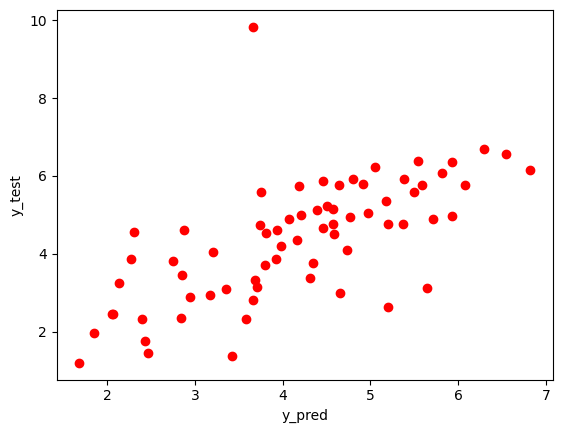

In [88]:
from sklearn.metrics import r2_score
print("r2:",r2_score(y_test, y_pred))
plt.scatter(y_pred, y_test, c = 'r')
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()